In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import json
import pdb

from utils import create_dict, create_list, get_data, find_type2_locations, find_type3_locations, find_type4_locations
from utils import applyArtifacts, removeCells, avg_firing, NumpyEncoder, avg_amplitude, nrActiveCells, div_avg_firing, div_avg_amplitude, top_least
from utils import cellID, spindle_locs, search_spindle, spi_inOut_diff
%config Completer.use_jedi = False

### Input informations

In [2]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2', 
               'L:/analysis_nima/210121_m24a/Batch_1']

# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]  
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
                custom_artifacts_4, custom_artifacts_5, custom_artifacts_6, custom_artifacts_7]

# cell removal 
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []
remove_cells = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6, remove_cell_7]
# mouse name
miceName = ['250520_m18a', '290520_m17a', '110620_m18b', '050820_m21a', '030720_m20a', '291020_m23a', '210121_m24a']

# mouse name indcies
mouse_index = {miceName[0]:0, miceName[1]:1, miceName[2]:2, miceName[3]:3, miceName[4]:4, miceName[5]:5, miceName[6]:6}


# saving figure 
save_fig = True # or False
fig_save_add = ''


# saving dataframes
save_file = True # or False
file_save_add = ''

### Creating base data structure and loading data and hypno to it
####    If ncessary first apply artifact on data or remove cells then create data structure

In [4]:
apply_artifact = True
rmCell = True

data_list = []
for address, sf, mouse_name, artifact, remove_cell in zip(all_address, sfs, miceName, artifacts, remove_cells):
    
    #clear and read data
    data = []; hypno = []
    data, hypno = get_data(address = address, sf = sf)
    
    if apply_artifact:
        data = applyArtifacts(data=data, artifacts=artifact)
    
    if rmCell:
        data = removeCells(data=data, cells = remove_cell)
    
    # creat per mouse list
    data_list.extend(create_list(data = data, hypno = hypno, mouseName = mouse_name, 
                                 sf = sf, apply_artifact=apply_artifact, removeCell=rmCell))

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
data and hypno shapes in file L:/

### Adding analyses as dictionary key, value pairs

In [5]:
# add average firing rate to the dictionary
[data_dict.update({'avg_firing_perSecond':avg_firing(data = data_dict['data'], 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list];

In [6]:
# add average amplitude to the dictionary
[data_dict.update({'avg_amplitude':avg_amplitude(data = data_dict['data'])}) for data_dict in data_list];

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:222: RuntimeWarning: Mean of empty slice


In [7]:
# add top and least firing rate 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [8]:
# add top and least amplitude 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [9]:
# add divided average firing rate to the dictionary
[data_dict.update({'div_avg_firing_perSecond':div_avg_firing(data = data_dict['data'], 
                                                             sf=data_dict['samplingRate'], 
                                                             n = 3)}) for data_dict in data_list];

In [10]:
# add divided average firing rate to the dictionary (n subdata)
[data_dict.update({'div_avg_amplitude':div_avg_amplitude(data = data_dict['data'], n=3)}) for data_dict in data_list];

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:222: RuntimeWarning: Mean of empty slice


In [11]:
# add epoch duration in sample
[data_dict.update({'epochDuration': data_dict['data'].shape[0]}) for data_dict in data_list];

In [12]:
# add nr of active cell per epoch
[data_dict.update({'nrActiveCells': nrActiveCells(data = data_dict['avg_amplitude'])}) for data_dict in data_list];

In [13]:
# add nr of total cells per epoch
[data_dict.update({'nrTotalCells': data_dict['data'].shape[1]}) for data_dict in data_list];

In [88]:
# adding location of type2 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        0 epoch is not involved in the pattern

##PATTERN1 == SWS_AWAKE---->950?
##PATTERN2 == SWS_REM
##PATTERN3 == REM_Awake

# finding locations (each location is the location of first element of the pattern)
type2_locations = find_type2_locations(dictLists=data_list, pattern=[-2, -3], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000)



[data_dict.update({'type2': 0}) for data_dict in data_list]

for i, data_dict in enumerate(data_list):
    if i in type2_locations:
        data_dict.update({'type2':1})
        data_list[i+1].update({'type2':2})

In [15]:
# adding location of type3 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        3 epoch is third element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type3_locations = find_type3_locations(dictLists=data_list, pattern=[-2, -3, -2], 
                                       cond1_min= 900, cond1_max=6000, 
                                       cond2_min=900, cond2_max=10000, 
                                       cond3_min=900, cond3_max=6000)



[data_dict.update({'type3': 0}) for data_dict in data_list]

for i in range(type3_locations.shape[0]):
    
    # put all pattern locations in the first element of the pattern
    data_list[type3_locations[i,0]].update({'type3':type3_locations[i,:]})
    

In [16]:
# adding location of type4 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        3 epoch is third element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type4_locations = find_type4_locations(dictLists=data_list, pattern=[0, -2, -3, -2], 
                                       cond1_min= 900, cond1_max=950, 
                                       cond2_min=900, cond2_max=10000, 
                                       cond3_min=900, cond3_max=10000,
                                       cond4_min=900, cond4_max=10000)



[data_dict.update({'type4': 0}) for data_dict in data_list]

for i in range(type4_locations.shape[0]):
    
    # put all pattern locations in the first element of the pattern
    data_list[type4_locations[i,0]].update({'type4':type4_locations[i,:]})
    

### Spindle/Slow Oscillations

In [80]:
spi_slow_use = True

# main file adrress (Niels data)
spi_slow_file_address = ['L:/analysis_nima/spindles/m18a.mat', 'L:/analysis_nima/spindles/m17a.mat', 
                        'L:/analysis_nima/spindles/m18b.mat', 'L:/analysis_nima/spindles/m21a.mat', 
                        'L:/analysis_nima/spindles/m20a.mat', 'L:/analysis_nima/spindles/m23a.mat', 
                        'L:/analysis_nima/spindles/m24a.mat']
# location of events in selected file (can be spindle or slow oscillation)----(spi/slo)
spi_slow_data_loc = 'Results/spi/events'

# start and end index (in spindle is 0-1 but in slow oscillation is 1-2)
spi_slow_start_index = 0
spi_slow_end_index = 1

# channel number we want to select ([0,0] or [0,1] - frontal or parietal)
spi_slow_channel_nr = [0,0]

# address for files with unit information
spi_slow_start_end_unit_address = ['L:/analysis_nima/250520_m18a/hypno_unit_sec_m18a.csv', 
                                   'L:/analysis_nima/290520_m17a/Batch/hypno_unit_sec_m17a.csv', 
                                   'L:/analysis_nima/110620_m18b/hypno_unit_sec_m18b.csv', 
                                   'L:/analysis_nima/050820_m21a/hypno_unit_sec_m21a.csv', 
                                   'L:/analysis_nima/030720_m20a/hypno_unit_sec_m20a.csv', 
                                   'L:/analysis_nima/291020_m23a/hypno_unit_sec_m23a.csv', 
                                   'L:/analysis_nima/210121_m24a/hypno_unit_sec_m24a.csv']


# Binary indicator to do coupled analysis or take all spindles (True only for spindles. Must be False for slow oscillation)
spi_slow_apply_couple = True

# When apply_couple is True this is indicator to select only coupled spindles (True) or non-coupled spindles (False)
spi_slow_couple_analysis = False

# channels number to select from coupled spindles ([0,0] or [0,1] - frontal or parietal)
spi_slow_couple_channel = [0,0]

# location of coupled spindles indices
spi_slow_couple_address = '/Results/slospi/spiIndx'

In [81]:
spi_slo_art_all = []
for i in range(len(spi_slow_file_address)):
    slow_osc = slo_spi(file_address=spi_slow_file_address[i], 
                       data_location=spi_slow_data_loc, channel_nr=spi_slow_channel_nr, 
                       start_index=spi_slow_start_index, end_index=spi_slow_end_index, 
                       start_end_file_add=spi_slow_start_end_unit_address[i], 
                       file_length= int(3e7), elec_sample=1000, unit_length=600, ca_fs=sfs[i], 
                       coupled = {'apply':spi_slow_apply_couple, 'address':spi_slow_couple_address, 
                                  'channel':spi_slow_couple_channel, 'cp':spi_slow_couple_analysis})
    print(f'running file {spi_slow_file_address[i]}')
    spi_slo_art_all.append(slow_osc.slo_spi_list())

running file L:/analysis_nima/spindles/m18a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m17a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m18b.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m21a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m20a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m23a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


running file L:/analysis_nima/spindles/m24a.mat


L:\analysis_nima\Python Scripts\Analyses_.py:2137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.file_address)


In [82]:
# adding spindle/oscillation data to database

# initializing data and indices
[data_dict.update({'spi_osc_data': []}) for data_dict in data_list];
[data_dict.update({'spi_osc_indices': []}) for data_dict in data_list];
[data_dict.update({'spi_osc_NOTdata': []}) for data_dict in data_list];
[data_dict.update({'spi_osc_NOTindices': []}) for data_dict in data_list];

# running analyses (data)
[data_dict.update({'spi_osc_data': search_spindle(data_spindle=spi_slo_art_all, Dict=data_dict, mouse_index=mouse_index)[0]}) for data_dict in data_list];

# running analyses (indices)
[data_dict.update({'spi_osc_indices': search_spindle(data_spindle=spi_slo_art_all, Dict=data_dict, mouse_index=mouse_index)[1]}) for data_dict in data_list];

# running analyses (NOTdata: data outside of spindle range)
[data_dict.update({'spi_osc_NOTdata': search_spindle(data_spindle=spi_slo_art_all, Dict=data_dict, mouse_index=mouse_index)[2]}) for data_dict in data_list if len(data_dict['spi_osc_data'])];


# running analyses (NOTindices)
[data_dict.update({'spi_osc_NOTindices': search_spindle(data_spindle=spi_slo_art_all, Dict=data_dict, mouse_index=mouse_index)[3]}) for data_dict in data_list];

In [83]:
# adding avg_firing rate for spi/osc and not spi/osc time periods

# initializing
[data_dict.update({'spi_osc_data_avgFiring': []}) for data_dict in data_list];
[data_dict.update({'spi_osc_NOTdata_avgFiring': []}) for data_dict in data_list];

[data_dict.update({'spi_osc_data_avgAmplitude': []}) for data_dict in data_list];
[data_dict.update({'spi_osc_NOTdata_avgAmplitude': []}) for data_dict in data_list];

# calculating average

[data_dict.update({'spi_osc_data_avgFiring': avg_firing(data = np.vstack(data_dict['spi_osc_data']), 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list if len(data_dict['spi_osc_data'])];

[data_dict.update({'spi_osc_NOTdata_avgFiring': avg_firing(data = data_dict['spi_osc_NOTdata'], 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list if len(data_dict['spi_osc_NOTdata'])];

[data_dict.update({'spi_osc_data_avgAmplitude': avg_amplitude(data = np.vstack(data_dict['spi_osc_data']))}) for data_dict in data_list if len(data_dict['spi_osc_data'])];

[data_dict.update({'spi_osc_NOTdata_avgAmplitude': avg_amplitude(data = data_dict['spi_osc_NOTdata'])}) for data_dict in data_list if len(data_dict['spi_osc_NOTdata'])];

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:222: RuntimeWarning: Mean of empty slice


In [84]:
# add top and least firing rate 
fraction = 20


# initializing
[data_dict.update({'spindle_top' + str(fraction) + '_diff_firing': []}) for data_dict in data_list];
[data_dict.update({'spindle_least' + str(fraction) + '_diff_firing': []}) for data_dict in data_list];

#top
[data_dict.update({'spindle_top' + str(fraction) + '_diff_firing':top_least(data=spi_inOut_diff(x = data_dict['spi_osc_data_avgFiring'], 
                                                                                                y = data_dict['spi_osc_NOTdata_avgFiring']), 
                                                                   prc = fraction, top = True)}) for data_dict in data_list if len(data_dict['spi_osc_data'])];

#least
[data_dict.update({'spindle_least' + str(fraction) + '_diff_firing':top_least(data=spi_inOut_diff(x = data_dict['spi_osc_data_avgFiring'], 
                                                                                                  y = data_dict['spi_osc_NOTdata_avgFiring']), 
                                                                   prc = fraction, top = False)}) for data_dict in data_list if len(data_dict['spi_osc_data'])];

# Plotting of analyses

### Spindle/Slow Oscillation

#### Frequency Type 2 spindle active not divided

############################################ RUN FOR AWAKE-SWS ###############################################

In [27]:
###################################### HINT ############################################
########################################################################################
### --->  RUN THIS CELL ONLY WHEN YOU CONSIDER AWAKE-SWS (it takes 20% top spindle/SO from SWS)


df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 2  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[i-1]['avg_firing_perSecond'][data_list[i]['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i]['avg_firing_perSecond'][data_list[i]['spindle_top20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','royalblue'],linewidth=4,data=x )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)

####change address
#if save_file:
 #   df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/awake_sws/frontal_electrode/Type2_fr_spindle_coupled_active.csv')
#if save_file:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/awake_sws/frontal_electrode/spindle_coupled/Type2_fr_spindle_coupled_active_boxplot.pdf', dpi=600, format='pdf')

#### Frequency Type 2 spindle inactive not divided

In [ ]:
###################################### HINT ############################################
########################################################################################
### --->  RUN THIS CELL ONLY WHEN YOU CONSIDER AWAKE-SWS (it takes 20% top spindle/SO from SWS)


df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 2  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[i-1]['avg_firing_perSecond'][data_list[i]['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i]['avg_firing_perSecond'][data_list[i]['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','royalblue'],linewidth=4,data=x )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)

####change address
#if save_file:
 #   df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/awake_sws/frontal_electrode/Type2_fr_spindle_coupled_active.csv')
#if save_file:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/awake_sws/frontal_electrode/spindle_coupled/Type2_fr_spindle_coupled_active_boxplot.pdf', dpi=600, format='pdf')

############################################ END RUN FOR AWAKE-SWS ###############################################

#### Frequency Type 2 spindle active not divided

In [62]:
# Type2 not divided

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_firing_perSecond'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_firing_perSecond'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


(0.0, 0.2)

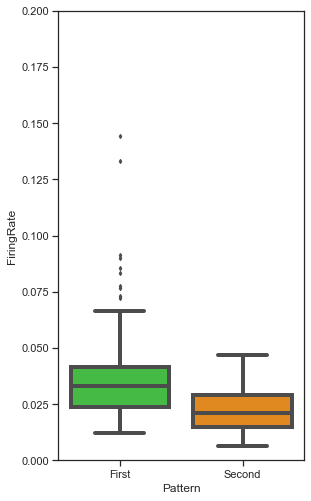

In [119]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','royalblue'],linewidth=4,data=x )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)
#if save_file:
 #   df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/awake_sws/frontal_electrode/Type2_fr_spindle_coupled_active.csv')
#if save_file:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/awake_sws/frontal_electrode/spindle_coupled/Type2_fr_spindle_coupled_active_boxplot.pdf', dpi=600, format='pdf')

#### Frequency Type 2 spindle inactive not divided

In [ ]:
# Type2 not divided

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','royalblue'],linewidth=4,data=x )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)
#if save_file:
 #   df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/awake_sws/frontal_electrode/Type2_fr_spindle_coupled_active.csv')
#if save_file:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/awake_sws/frontal_electrode/spindle_coupled/Type2_fr_spindle_coupled_active_boxplot.pdf', dpi=600, format='pdf')

#### Frequency based on top x% of spindle active divided to n

In [44]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()
df_typ2_firing1 = pd.DataFrame()
df_typ2_firing2 = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1 and (len(indDict['spi_osc_data'])):
        df_typ2_firing1 = df_typ2_firing1.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['spindle_top20_diff_firing'][0]])],
                                                               'name':indDict['mouseName'],                                                               
                                                               'epochID': i}), ignore_index = True)
        
        df_typ2_firing2 = df_typ2_firing2.append(pd.DataFrame({'1th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][0][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][1][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][2][indDict['spindle_top20_diff_firing'][0]])], 
                                                               'name':indDict['mouseName'],                                                             
                                                               'epochID': i}), ignore_index = True)


df_typ2_firing1 = df_typ2_firing1.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='First')
df_typ2_firing2 = df_typ2_firing2.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='Second')

df_typ2_firing = df_typ2_firing1.merge(df_typ2_firing2, on=['name', 'levels', 'epochID'])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [167]:
# plotting average firing rate 

# plotting average firing rate 

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_firing_perSecond'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_firing_perSecond'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    



C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


In [40]:
df_typ2_firing

,First,Second,name,epochID
0,0.033280,0.020763,250520_m18a,283
1,0.032201,0.021348,290520_m17a,649
2,0.036226,0.015742,290520_m17a,656
3,0.040940,0.026884,110620_m18b,749
4,0.035403,0.012513,110620_m18b,927


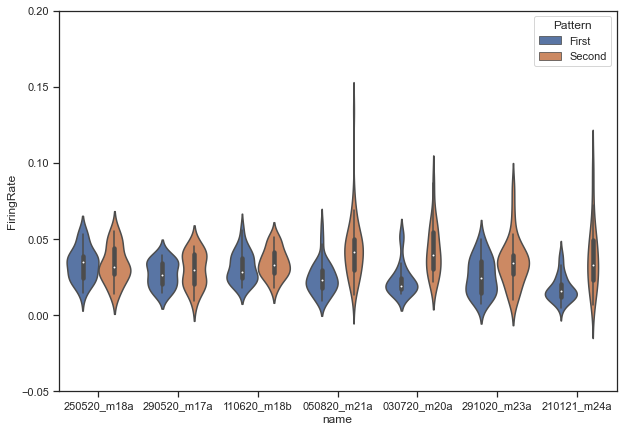

In [155]:
# plotting average firing rate ----> For statistics without levels

df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 0.2])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/Type2_fr_based_on_top20%_spindle_active.csv')


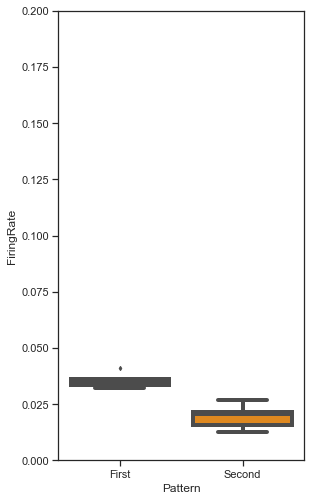

In [39]:
#df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=x )
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','darkorange'],linewidth=4,data=x )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)
if save_file:
    df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/sws_rem/Type2_fr_spindle_active_awake_sws.csv')
if save_file:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/sws_rem/Type2_fr_spindle_active_boxplot_awake_sws.pdf', dpi=600, format='pdf')

In [24]:
df_typ2_firing

,name,epochID,levels,First,Second
0,250520_m18a,58,1th,0.072798,0.082434
1,250520_m18a,153,1th,0.099984,0.107675
2,250520_m18a,213,1th,0.099984,0.031492
3,250520_m18a,234,1th,0.056330,0.089841
4,250520_m18a,247,1th,0.068516,0.048927
...,...,...,...,...,...
262,210121_m24a,1944,3th,0.034499,NaN
263,210121_m24a,1954,3th,0.071803,0.023173
264,210121_m24a,1969,3th,0.036280,0.074867
265,210121_m24a,1995,3th,0.061655,0.058784


In [119]:
###Pattern 1
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name',  'epochID'], var_name='Pattern', value_name='firing_rate')
#df_temp.Pattern.replace([First], SWS)
Pattern1=df_temp.replace(to_replace=r'First', value='SWS', regex=True)
Pattern1=Pattern1.replace(to_replace=r'Second', value='Awake', regex=True)
Pattern1

,name,epochID,Pattern,firing_rate
0,250520_m18a,28,SWS,0.027633
1,250520_m18a,48,SWS,0.037729
2,250520_m18a,50,SWS,0.036126
3,250520_m18a,54,SWS,0.028142
4,250520_m18a,82,SWS,0.029300
...,...,...,...,...
317,210121_m24a,1967,Awake,0.033292
318,210121_m24a,1981,Awake,0.053267
319,210121_m24a,2006,Awake,NaN
320,210121_m24a,2013,Awake,0.023285


In [129]:
### Pattern2
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='firing_rate')
#df_temp.Pattern.replace([First], SWS)
Pattern2=df_temp.replace(to_replace=r'First', value='SWS', regex=True)
Pattern2=Pattern2.replace(to_replace=r'Second', value='REM', regex=True)
Pattern2

,name,epochID,Pattern,firing_rate
0,250520_m18a,58,SWS,0.034843
1,250520_m18a,153,SWS,0.040332
2,250520_m18a,213,SWS,0.041040
3,250520_m18a,234,SWS,0.022154
4,250520_m18a,247,SWS,0.021246
...,...,...,...,...
151,210121_m24a,1944,REM,0.033256
152,210121_m24a,1954,REM,0.014264
153,210121_m24a,1969,REM,0.028521
154,210121_m24a,1995,REM,0.019969


In [130]:
sws_awake = Pattern1[Pattern1.Pattern == 'SWS']
sws_rem = Pattern2[Pattern2.Pattern == 'SWS']
sws_rem


,name,epochID,Pattern,firing_rate
0,250520_m18a,58,SWS,0.034843
1,250520_m18a,153,SWS,0.040332
2,250520_m18a,213,SWS,0.041040
3,250520_m18a,234,SWS,0.022154
4,250520_m18a,247,SWS,0.021246
...,...,...,...,...
73,210121_m24a,1944,SWS,0.009403
74,210121_m24a,1954,SWS,0.020684
75,210121_m24a,1969,SWS,0.014659
76,210121_m24a,1995,SWS,0.016637


In [131]:
sws_rem['Pattern'] = sws_rem['Pattern'].replace(['SWS'],'SWS_rem')
sws_awake['Pattern'] = sws_awake['Pattern'].replace(['SWS'],'SWS_awake')
sws=pd.concat([sws_rem, sws_awake])
sws

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,epochID,Pattern,firing_rate
0,250520_m18a,58,SWS_rem,0.034843
1,250520_m18a,153,SWS_rem,0.040332
2,250520_m18a,213,SWS_rem,0.041040
3,250520_m18a,234,SWS_rem,0.022154
4,250520_m18a,247,SWS_rem,0.021246
...,...,...,...,...
156,210121_m24a,1967,SWS_awake,0.012172
157,210121_m24a,1981,SWS_awake,0.012478
158,210121_m24a,2006,SWS_awake,0.006339
159,210121_m24a,2013,SWS_awake,0.009328


In [132]:
### Pattern3
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')
#df_temp.Pattern.replace([First], SWS)
Pattern3=df_temp.replace(to_replace=r'First', value='REM', regex=True)
Pattern3=Pattern3.replace(to_replace=r'Second', value='Awake', regex=True)
Pattern3

,name,levels,epochID,Pattern,firing_rate
0,250520_m18a,1th,283,REM,0.053059
1,290520_m17a,1th,649,REM,0.070657
2,110620_m18b,1th,785,REM,0.059990
3,250520_m18a,2th,283,REM,0.038799
4,290520_m17a,2th,649,REM,0.059952
5,110620_m18b,2th,785,REM,0.059874
6,250520_m18a,3th,283,REM,0.039125
7,290520_m17a,3th,649,REM,0.059836
8,110620_m18b,3th,785,REM,0.059874
9,250520_m18a,1th,283,Awake,0.039185


In [133]:
####Select SWS
sws1 = Pattern1[Pattern1.Pattern == 'SWS']
sws2=Pattern2[Pattern2.Pattern == 'SWS']
sws=pd.concat([sws1, sws2])
sws['firing_rate'].isnull().sum()
###drop NaN 
sws = sws[sws['firing_rate'].notna()]


In [134]:
####Select awake from pattern 3 and 1

awake1 = Pattern1[Pattern1.Pattern == 'Awake']
awake2=Pattern3[Pattern3.Pattern == 'Awake']
awake=pd.concat([awake1, awake2])
###drop NaN 
awake = awake[awake['firing_rate'].notna()]

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(-0.05, 0.2)

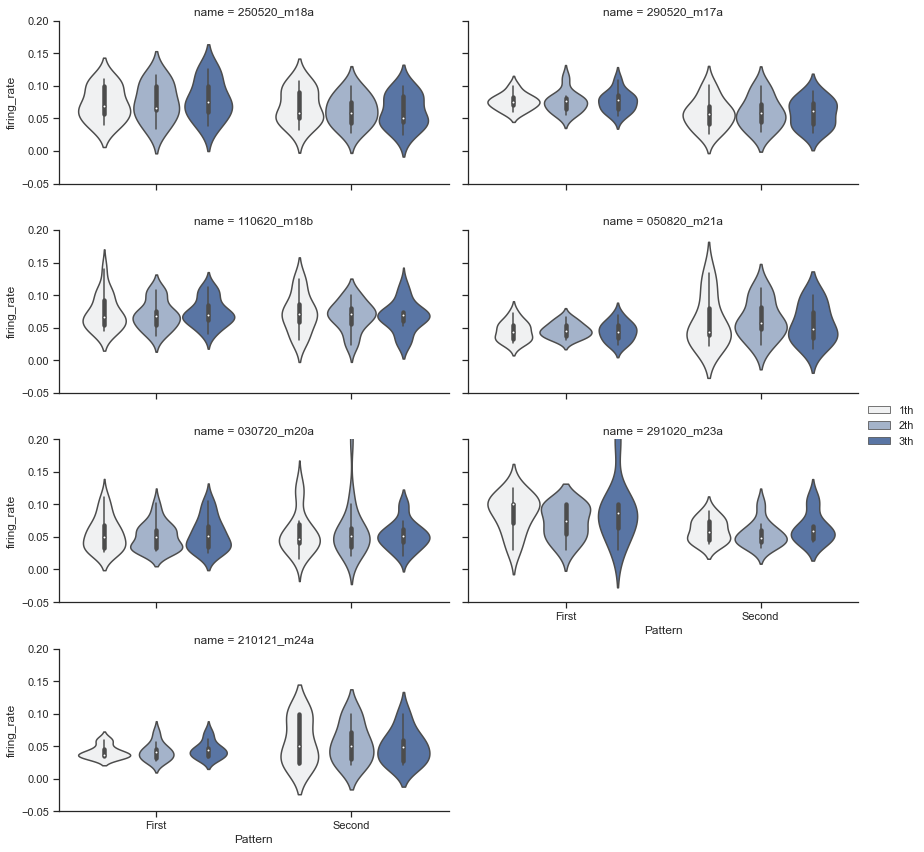

In [50]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
plt.ylim([-.05, 0.2])
#if save_file:
   # df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/Type2_fr_based_on_top20%_divided_thirds_slo_active.csv')
#if save_fig:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/Type2_fr_based_on_top20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Frequency based on least x% of spindle active divided to n

In [65]:
###################################### HINT ############################################
########################################################################################

#  This is a example cell to run Type2 awake sws with considering 20% top spindle/slow 
# from slow-wave which comes in SECOND PLACE

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 2  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[i-1]['avg_firing_perSecond'][data_list[i]['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i]['avg_firing_perSecond'][data_list[i]['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

In [67]:
# Type2 not divided

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [253]:
df_temp

,name,epochID,Pattern,firing_rate
0,250520_m18a,58,First,0.065437
1,250520_m18a,153,First,0.079957
2,250520_m18a,213,First,0.068636
3,250520_m18a,234,First,0.058876
4,250520_m18a,247,First,0.063312
...,...,...,...,...
173,210121_m24a,1944,Second,0.033256
174,210121_m24a,1954,Second,0.015749
175,210121_m24a,1969,Second,0.019965
176,210121_m24a,1995,Second,0.025675


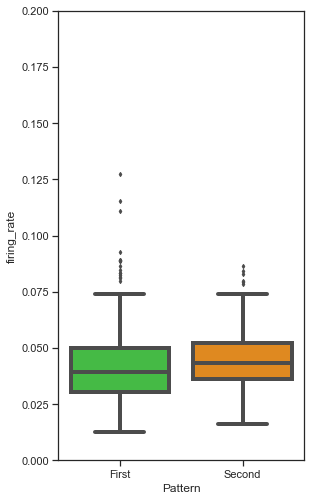

In [25]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='firing_rate')

sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="firing_rate",dodge=False,fliersize=3, palette=['darkorange','royalblue'],linewidth=4,data=df_temp )
g=sns.boxplot(x="Pattern", y="firing_rate",dodge=False,fliersize=3, palette=['limegreen','darkorange'],linewidth=4,data=df_temp )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
plt.ylim(0,0.2)
if save_file:
    df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/awake_sws/frontal_electrode/Type2_fr_spindle_coupled_inactive.csv')
if save_file:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/awake_sws/frontal_electrode/spindle_coupled/Type2_fr_spindle_coupled_inactive_boxplot.pdf', dpi=600, format='pdf')

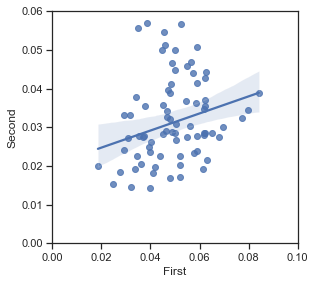

In [68]:
sns.set(rc={'figure.figsize':(4.4,4.27)})
sns.set_style("ticks")
g=sns.regplot(x="First",
           y="Second", robust=True,
           data=df_typ2_firing)
plt.xlim(0,0.1)
plt.ylim(0,0.06)
#if save_file:
  #  df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_spindle_inactive.csv')
if save_file:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_slo_inactive.pdf', dpi=600, format='pdf')

(0.0, 0.1)

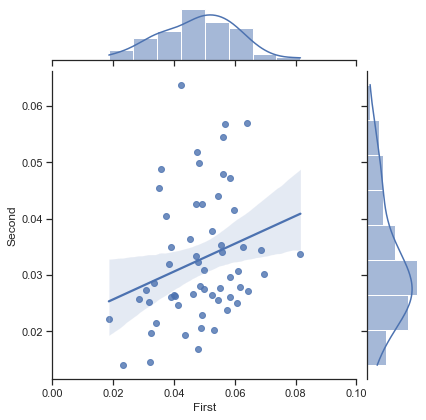

In [85]:
### TEST####
sns.jointplot(data= df_typ2_firing, x="First",y="Second",kind="reg")
plt.xlim(0,0.1)

#plot_.join_plot(bins_= np.linspace(-.01, 4, 50), kind_ = 'reg')

In [1]:
df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_firing_perSecond'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


NameError: name 'pd' is not defined

In [136]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()
df_typ2_firing1 = pd.DataFrame()
df_typ2_firing2 = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1 and (len(indDict['spi_osc_data'])):
        df_typ2_firing1 = df_typ2_firing1.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['spindle_least20_diff_firing'][0]])],
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)
        
        df_typ2_firing2 = df_typ2_firing2.append(pd.DataFrame({'1th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][0][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][1][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(data_list[i+1]['div_avg_firing_perSecond'][2][indDict['spindle_least20_diff_firing'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)


df_typ2_firing1 = df_typ2_firing1.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='First')
df_typ2_firing2 = df_typ2_firing2.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='Second')

df_typ2_firing = df_typ2_firing1.merge(df_typ2_firing2, on=['name', 'levels', 'epochID'])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [124]:
###Pattern 1
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')
#df_temp.Pattern.replace([First], SWS)
Pattern1_least=df_temp.replace(to_replace=r'First', value='SWS', regex=True)
Pattern1_least=Pattern1_least.replace(to_replace=r'Second', value='Awake', regex=True)
Pattern1_least

,name,levels,epochID,Pattern,firing_rate
0,250520_m18a,1th,28,SWS,0.122996
1,250520_m18a,1th,48,SWS,0.093811
2,250520_m18a,1th,50,SWS,0.147595
3,250520_m18a,1th,54,SWS,0.108141
4,250520_m18a,1th,82,SWS,0.091691
...,...,...,...,...,...
961,210121_m24a,3th,1967,Awake,0.099662
962,210121_m24a,3th,1981,Awake,0.132883
963,210121_m24a,3th,2006,Awake,0.093584
964,210121_m24a,3th,2013,Awake,0.059836


In [137]:
### Pattern2
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')
#df_temp.Pattern.replace([First], SWS)
Pattern2_least=df_temp.replace(to_replace=r'First', value='SWS', regex=True)
Pattern2_least=Pattern2_least.replace(to_replace=r'Second', value='REM', regex=True)
Pattern2

,name,levels,epochID,Pattern,firing_rate
0,250520_m18a,1th,58,SWS,0.093674
1,250520_m18a,1th,153,SWS,0.099984
2,250520_m18a,1th,213,SWS,0.099984
3,250520_m18a,1th,234,SWS,0.045329
4,250520_m18a,1th,247,SWS,0.059952
...,...,...,...,...,...
463,210121_m24a,3th,1944,REM,NaN
464,210121_m24a,3th,1954,REM,0.029169
465,210121_m24a,3th,1969,REM,0.074867
466,210121_m24a,3th,1995,REM,0.068403


In [144]:
####Select SWS
sws1 = Pattern1_least[Pattern1_least.Pattern == 'SWS']
sws2=Pattern2_least[Pattern2_least.Pattern == 'SWS']
sws=pd.concat([sws1, sws2])
sws['firing_rate'].isnull().sum()
###REPLACE NaN WITH 0
sws=sws.fillna(0)

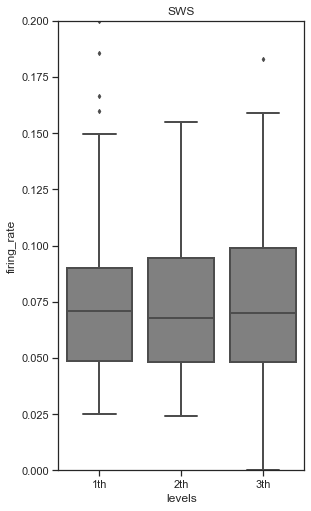

In [145]:
x=sws
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
#sns.lineplot(data=x, x="level", y="firing_rate", style="state",color='blue',markers=True,legend = False)
#sns.barplot(data=x, x="level", y="firing_rate", ci=95)
#ax = sns.barplot(data=x, x="level", y="firing_rate", color="Grey")
ax=sns.boxplot(x="levels", y="firing_rate",dodge=False,fliersize=3,color='grey',linewidth=2,data=x )
ax.set_ylim([0,0.2])
ax.set_title('SWS')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_barplot_sws_slo_inactive.pdf', dpi=600,)  


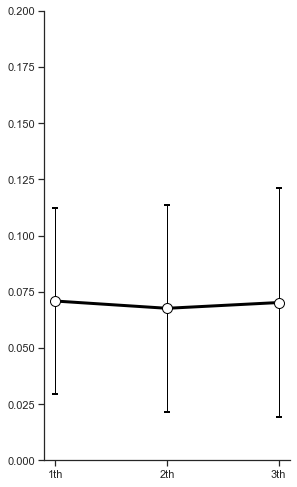

In [146]:
x=sws
x_stats = x.groupby(['levels']).describe()
j = x_stats.index
medians = x_stats[('firing_rate', '50%')]
upper=x_stats [('firing_rate', '75%')]
lower=x_stats [('firing_rate', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#x.set_title('SWS')
ax=plt.ylim(0,0.2)
#ax.set_xticklabels(['1st','2nd','3rd'])
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_sws_slo_inactive.pdf', dpi=600,) 

In [147]:
####Select REM
rem1 = Pattern1_least[Pattern1_least.Pattern == 'REM']
rem2=Pattern2_least[Pattern2_least.Pattern == 'REM']
rem=pd.concat([rem1, rem2])
###REPLACE NaN WITH 0
rem=rem.fillna(0)

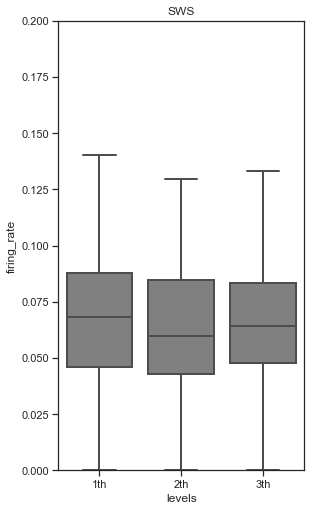

In [148]:
x=rem
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
#sns.lineplot(data=x, x="level", y="firing_rate", style="state",color='blue',markers=True,legend = False)
#sns.barplot(data=x, x="level", y="firing_rate", ci=95)
#ax = sns.barplot(data=x, x="level", y="firing_rate", color="Grey")
ax=sns.boxplot(x="levels", y="firing_rate",dodge=False,fliersize=3,color='grey',linewidth=2,data=x )
ax.set_ylim([0,0.2])
ax.set_title('SWS')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_barplot_rem_slo_inactive.pdf', dpi=600,)  


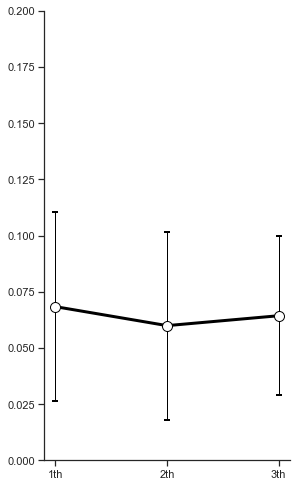

In [149]:
x=rem
x_stats = x.groupby(['levels']).describe()
j = x_stats.index
medians = x_stats[('firing_rate', '50%')]
upper=x_stats [('firing_rate', '75%')]
lower=x_stats [('firing_rate', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#x.set_title('SWS')
ax=plt.ylim(0,0.2)
#ax.set_xticklabels(['1st','2nd','3rd'])
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_rem_slo_inactive.pdf', dpi=600,) 

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


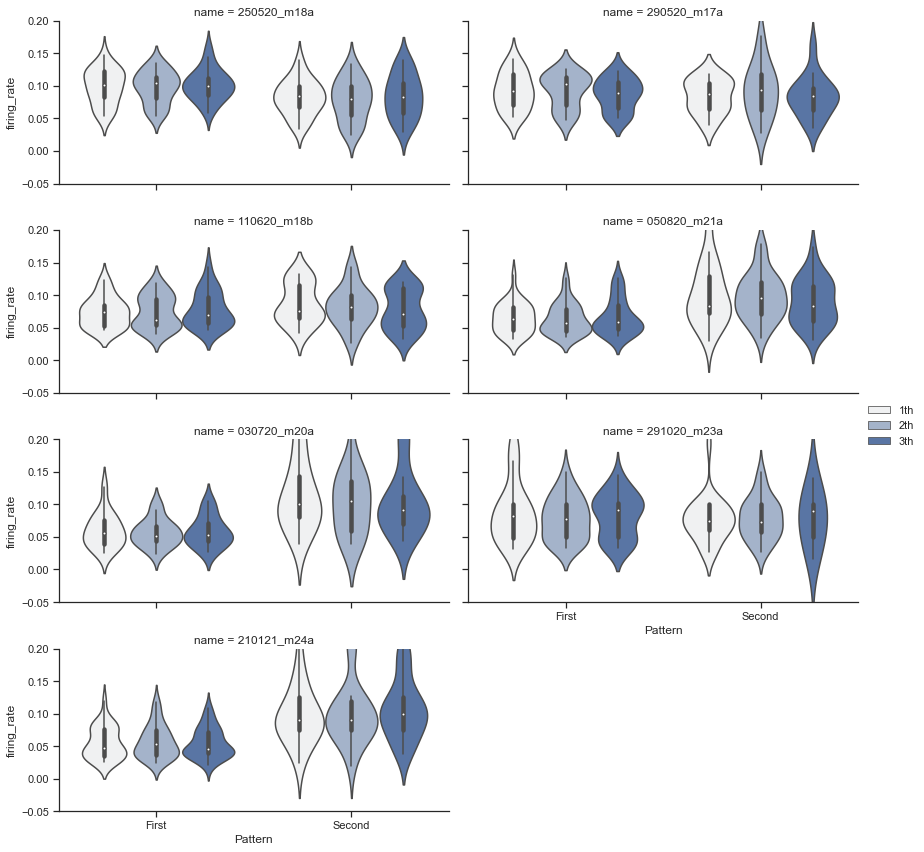

In [125]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
plt.ylim([-.05, 0.2])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr/Type2_fr_based_on_least20%_divided_thirds_slo_active.csv')
#if save_fig:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr/Type2_fr_based_on_least20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude Type 2

#### Amplitude based on top x% spindle active

In [22]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_amplitude'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_amplitude'][indDict['spindle_top20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


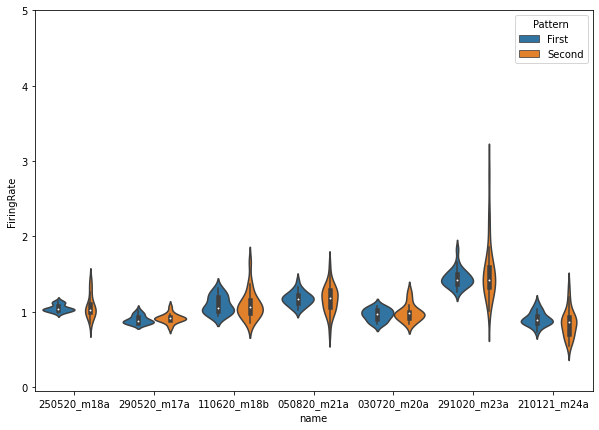

In [23]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 5])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_amp/Type2_amp_based_on_top20%_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_amp/Type2_amp_based_on_top20%_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% spindle active

In [24]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(indDict['avg_amplitude'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[i+1]['avg_amplitude'][indDict['spindle_least20_diff_firing'][0]])],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


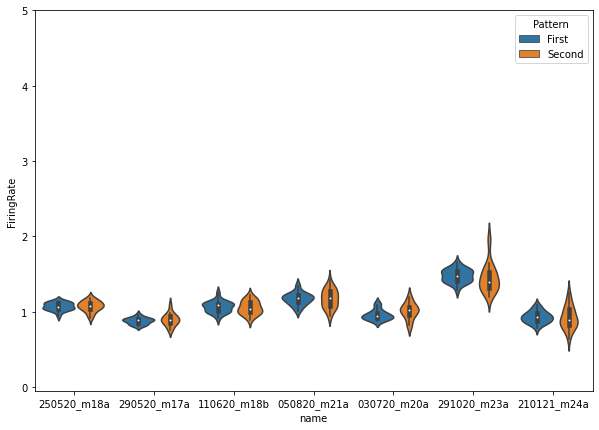

In [25]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 5])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_amp/Type2_amp_based_on_least20%_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_amp/Type2_amp_based_on_least20%_slo.pdf', dpi=300, format='pdf')

#### Amplitude based on top x% of spindle active divided to n

In [26]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()
df_typ2_firing1 = pd.DataFrame()
df_typ2_firing2 = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1 and (len(indDict['spi_osc_data'])):
        df_typ2_firing1 = df_typ2_firing1.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['spindle_top20_diff_firing'][0]])],
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)
        
        df_typ2_firing2 = df_typ2_firing2.append(pd.DataFrame({'1th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][0][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][1][indDict['spindle_top20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][2][indDict['spindle_top20_diff_firing'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)


df_typ2_firing1 = df_typ2_firing1.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='First')
df_typ2_firing2 = df_typ2_firing2.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='Second')

df_typ2_firing = df_typ2_firing1.merge(df_typ2_firing2, on=['name', 'levels', 'epochID'])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


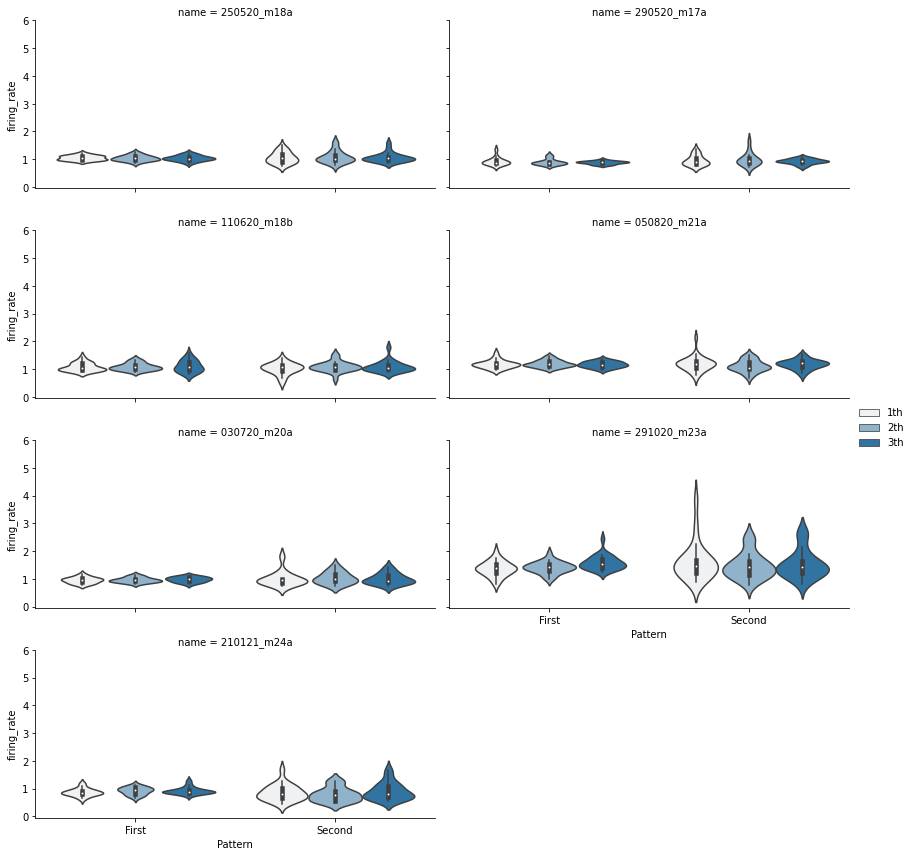

In [27]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_amp/Type2_amp_based_on_top20%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_amp/Type2_amp_based_on_top20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% of spindle active divided to n

In [28]:
# plotting average firing rate 

df_typ2_firing = pd.DataFrame()
df_typ2_firing1 = pd.DataFrame()
df_typ2_firing2 = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1 and (len(indDict['spi_osc_data'])):
        df_typ2_firing1 = df_typ2_firing1.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['spindle_least20_diff_firing'][0]])],
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)
        
        df_typ2_firing2 = df_typ2_firing2.append(pd.DataFrame({'1th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][0][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '2th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][1][indDict['spindle_least20_diff_firing'][0]])], 
                                                               '3th':[np.nanmean(data_list[i+1]['div_avg_amplitude'][2][indDict['spindle_least20_diff_firing'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'epochID': i}), ignore_index = True)


df_typ2_firing1 = df_typ2_firing1.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='First')
df_typ2_firing2 = df_typ2_firing2.melt(id_vars=['name', 'epochID'], var_name='levels', value_name='Second')

df_typ2_firing = df_typ2_firing1.merge(df_typ2_firing2, on=['name', 'levels', 'epochID'])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


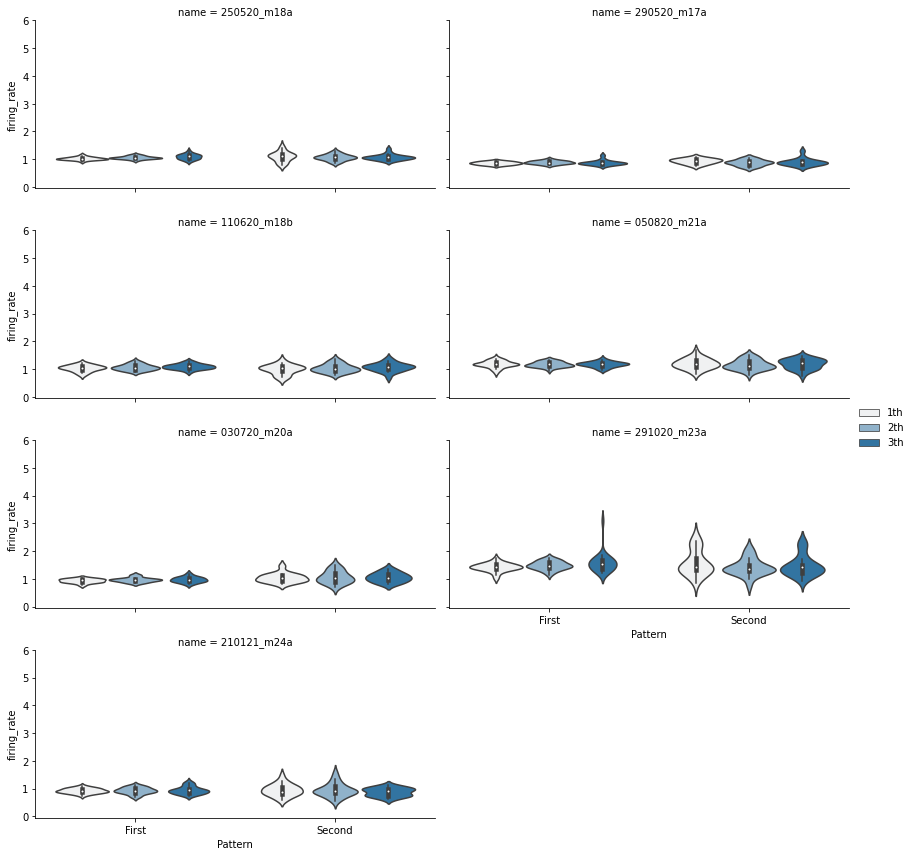

In [29]:
df_temp = pd.DataFrame()
df_temp = df_typ2_firing.melt(id_vars=['name', 'levels', 'epochID'], var_name='Pattern', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_amp/Type2_amp_based_on_least20%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_amp/Type2_amp_based_on_least20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Frequency Type 3

#### Frequency based on top x% spindle active

In [22]:
# plotting average firing rate 

df_spindle_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_firing = df_spindle_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond'][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


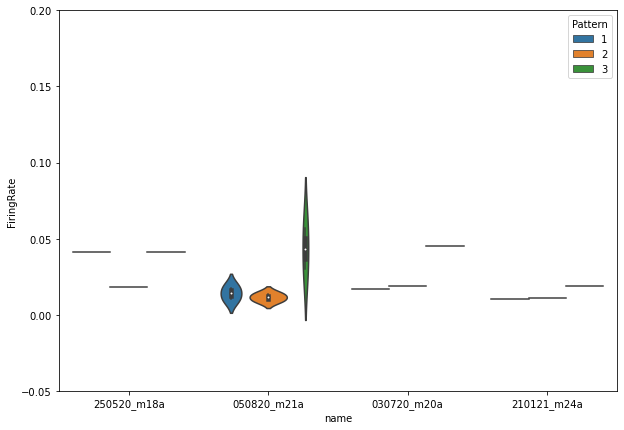

In [40]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df_spindle_firing, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 0.2])
if save_file:
    df_spindle_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/Type3_fr_based_on_top15%_slo.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_based_on_top15%_slo.pdf', dpi=300, format='pdf')

#### Frequency based on least x% spindle active


In [24]:
# plotting average firing rate 

df_spindle_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_firing = df_spindle_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond'][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


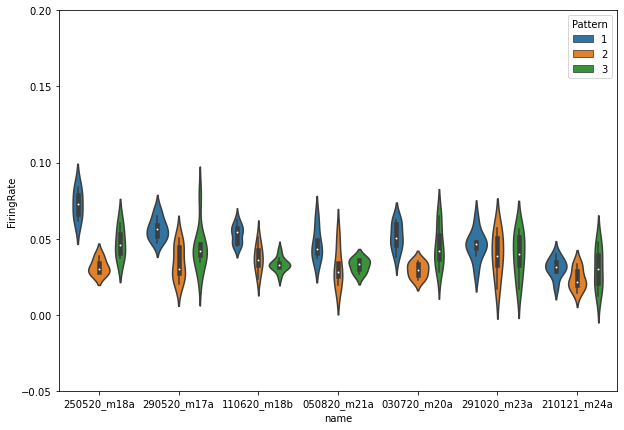

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df_spindle_firing, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 0.2])
if save_file:
    df_spindle_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/Type3_fr_based_on_least15%_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_based_on_least15%_slo_active.pdf', dpi=300, format='pdf')

#### Frequency based on top x% of spindle active divided to n

In [116]:
# plotting average firing rate 

df_spindle_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_firing = df_spindle_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       'name':indDict['mouseName'], 
                                                                       'Pattern': ii+1, 
                                                                       'epochID': i}), ignore_index = True)
    


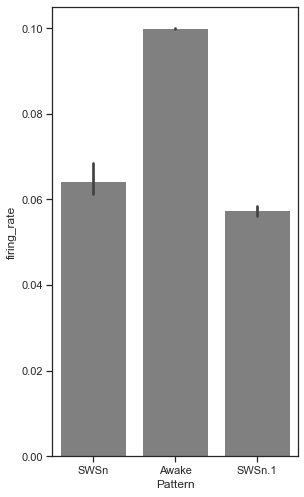

In [37]:
df_temp = pd.DataFrame()
df_temp = df_spindle_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='firing_rate')
#x=df_temp.groupby(["name","Pattern","subEpoch"], as_index=False).agg({"firing_rate": np.mean})
x = df_temp.groupby(by = ["Pattern","subEpoch"], as_index=False).agg(np.median)
#x = df_temp[df_temp.Pattern == 1].groupby(by = ["subEpoch", "Pattern"], as_index=False).agg(np.median)
#myGrid = sns.FacetGrid(data=x, aspect=4, ylim=[-.05, 0.3])
#myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'subEpoch')
#myplot.add_legend()
#if save_fig:
   # plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_divided_thirds.pdf', dpi=300, format='pdf')

#sns.lineplot(x="Pattern", y="firing_rate", hue= "subEpoch",err_style='bars', data=x)
#sns.pointplot(x="Pattern", y="firing_rate", hue= "subEpoch", ylim=[1, 2],data=x)
#sns.violinplot(x="Pattern", y="firing_rate", hue="subEpoch",data=x )
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.barplot(x="Pattern", y="firing_rate",color="Grey",data=x )
g.set_xticklabels(['SWSn','Awake','SWSn.1'])

#sns.catplot(x="Pattern", y="firing_rate", hue= "subEpoch",kind="point",height=6, aspect=.75,data=x)
#g=sns.PairGrid(x,y_vars="firing_rate",x_vars=["SWSn", "REM", "SWSn+1", ],
             #height=5, aspect=.5)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_divided_thirds_bar_plot_all_cells.pdf', dpi=300, format='pdf')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


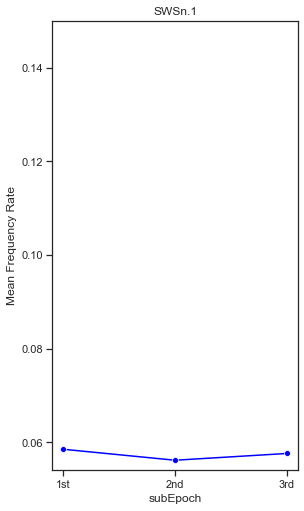

In [29]:
###choose pattern to plot####
df_temp = pd.DataFrame()
df_temp = df_spindle_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='firing_rate')
x = df_temp[df_temp.Pattern == 3].groupby(by = ["subEpoch", "Pattern"], as_index=False).agg(np.median)
ax = plt.gca()
#ax.set_facecolor('xkcd:salmon')
#ax.set_facecolor((1, 0.47, 0.42)) ####REM####
#ax.set_facecolor((0.4,0.6,0.7)) ####SWS####
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set()
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")

g=sns.lineplot(x="subEpoch", y="firing_rate", style="Pattern",color='blue',markers=True,err_style='band',legend = False, data=x)
g.set_xticklabels(['1st','2nd','3rd'])
g.set_title('SWSn.1')
g.set(xlabel='subEpoch', ylabel='Mean Frequency Rate')
#g.sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylim(0.054,0.15)
#plt.ylim(0.011,0.12)

if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_divided_thirds_swsn.1_spindle_coupled_active.pdf', dpi=300, format='pdf')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


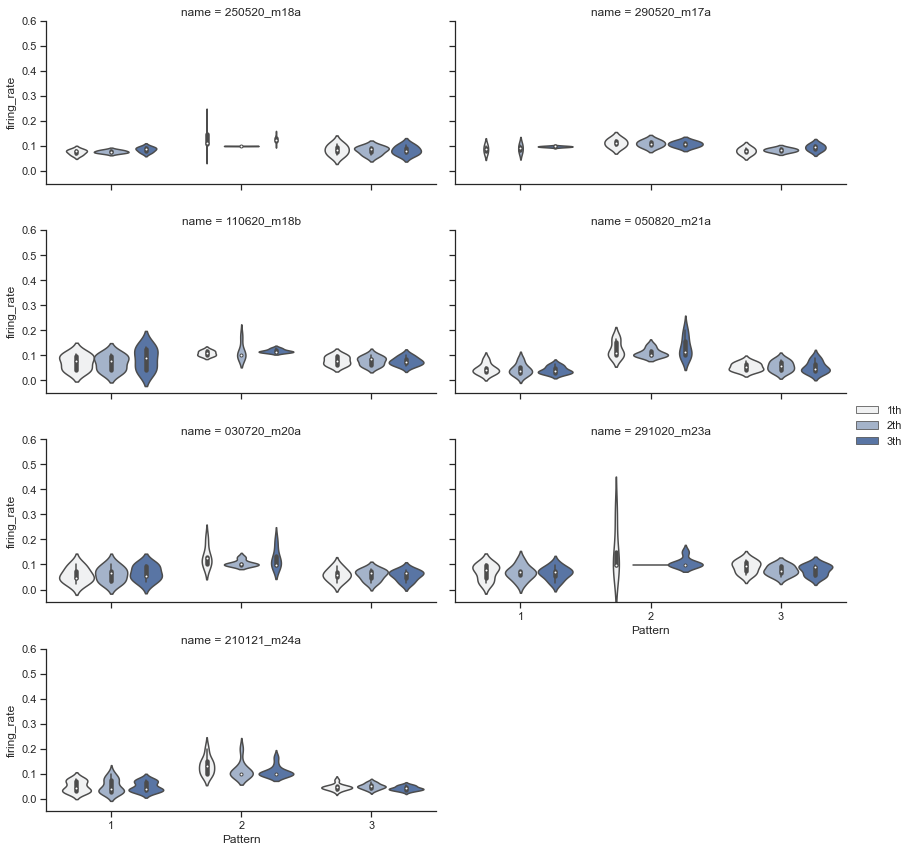

In [41]:
df_temp = pd.DataFrame()
df_temp = df_spindle_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'subEpoch')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/Type3_fr_based_on_top15%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_based_on_top15%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Frequency based on least x% of spindle active divided to n

In [31]:
# plotting average firing rate 

df_spindle_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_firing = df_spindle_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       'name':indDict['mouseName'], 
                                                                       'Pattern': ii+1, 
                                                                       'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


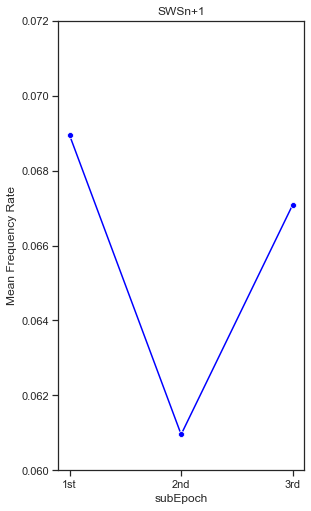

In [30]:
###choose pattern to plot####
df_temp = pd.DataFrame()
df_temp = df_spindle_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='firing_rate')
x = df_temp[df_temp.Pattern == 3].groupby(by = ["subEpoch", "Pattern"], as_index=False).agg(np.median)
ax = plt.gca()
#ax.set_facecolor('xkcd:salmon')
#ax.set_facecolor((1, 0.47, 0.42)) ####REM####
#ax.set_facecolor((0.4,0.6,0.7)) ####SWS####
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set()
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")

g=sns.lineplot(x="subEpoch", y="firing_rate", style="Pattern",color='blue',markers=True,legend = False, data=x)
g.set_xticklabels(['1st','2nd','3rd'])
g.set_title('SWSn+1')
g.set(xlabel='subEpoch', ylabel='Mean Frequency Rate')
#g.sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylim(0.06,0.072)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_divided_thirds_swsn.1_spindle_coupled_inactive.pdf', dpi=300, format='pdf')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyboardInterrupt: 

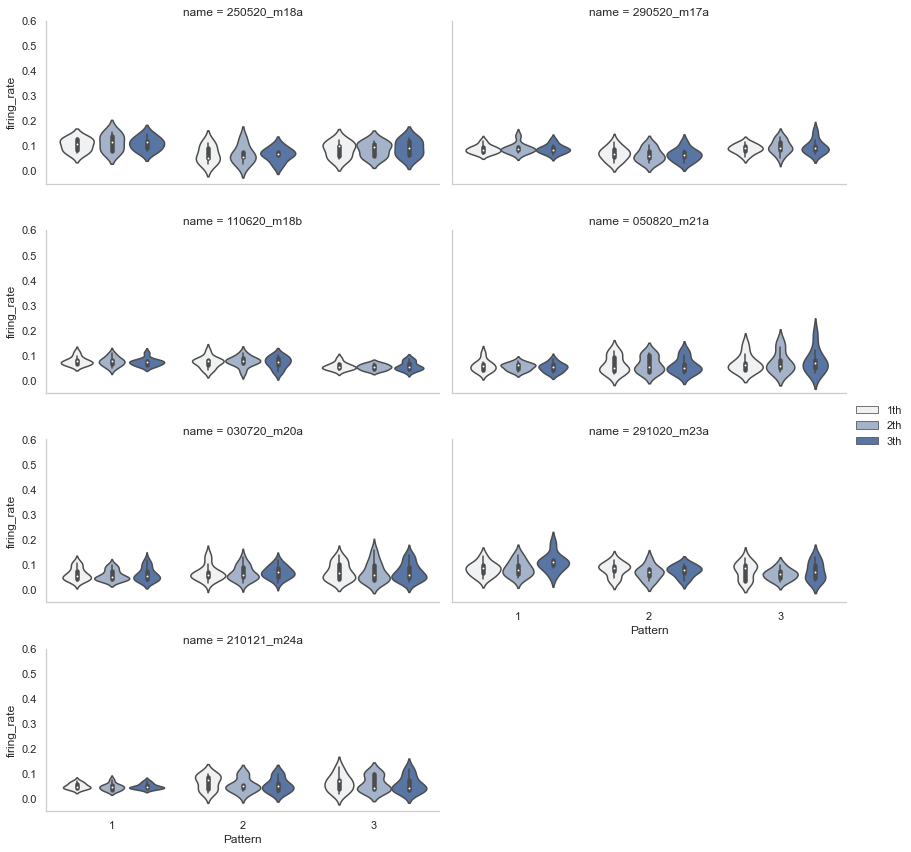

In [29]:
df_temp = pd.DataFrame()
df_temp = df_spindle_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'subEpoch')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/Type3_fr_based_on_least15%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/Type3_fr_based_on_least15%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude Type 3

#### Amplitude based on top x% of sindle active

In [45]:
# plotting average firing rate 

df_spindle_amplitude = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_amplitude = df_spindle_amplitude.append(pd.DataFrame({'Amplitude':[np.nanmean(data_list[indDict['type3'][ii]]['avg_amplitude'][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


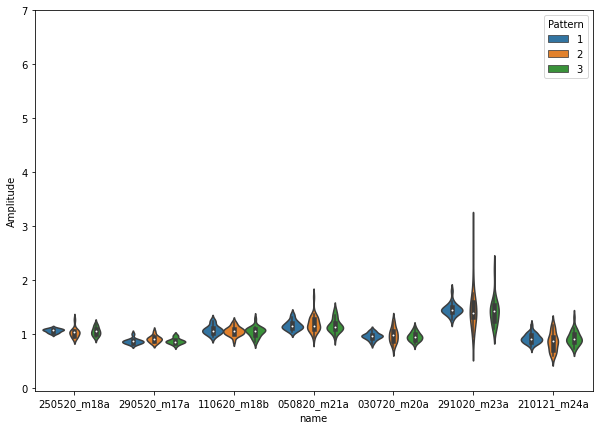

In [46]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df_spindle_amplitude, y='Amplitude', x = 'name', hue='Pattern')
plt.ylim([-.05, 7])
if save_file:
    df_spindle_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_amp/Type3_amp_based_on_top_20%_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_amp/Type3_amp_based_on_top_20%_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% of spindle active


In [47]:
# plotting average firing rate 

df_spindle_amplitude = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_amplitude = df_spindle_amplitude.append(pd.DataFrame({'Amplitude':[np.nanmean(data_list[indDict['type3'][ii]]['avg_amplitude'][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


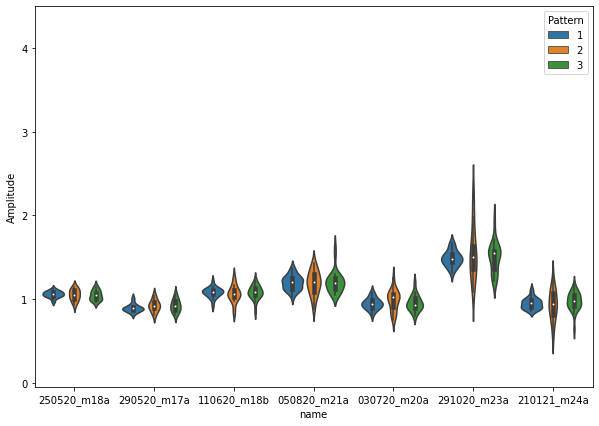

In [48]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df_spindle_amplitude, y='Amplitude', x = 'name', hue='Pattern')
plt.ylim([-.05, 4.5])
if save_file:
    df_spindle_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_amp/Type3_amp_based_on_least_20%_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_amp/Type3_amp_based_on_least_20%_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude based on top x% spindle active divided to n

In [49]:
# plotting average firing rate 

df_spindle_amplitude = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_amplitude = df_spindle_amplitude.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][0][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][1][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][2][data_list[indDict['type3'][0]]['spindle_top20_diff_firing'][0]])], 
                                                                       'name':indDict['mouseName'], 
                                                                       'Pattern': ii+1, 
                                                                       'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


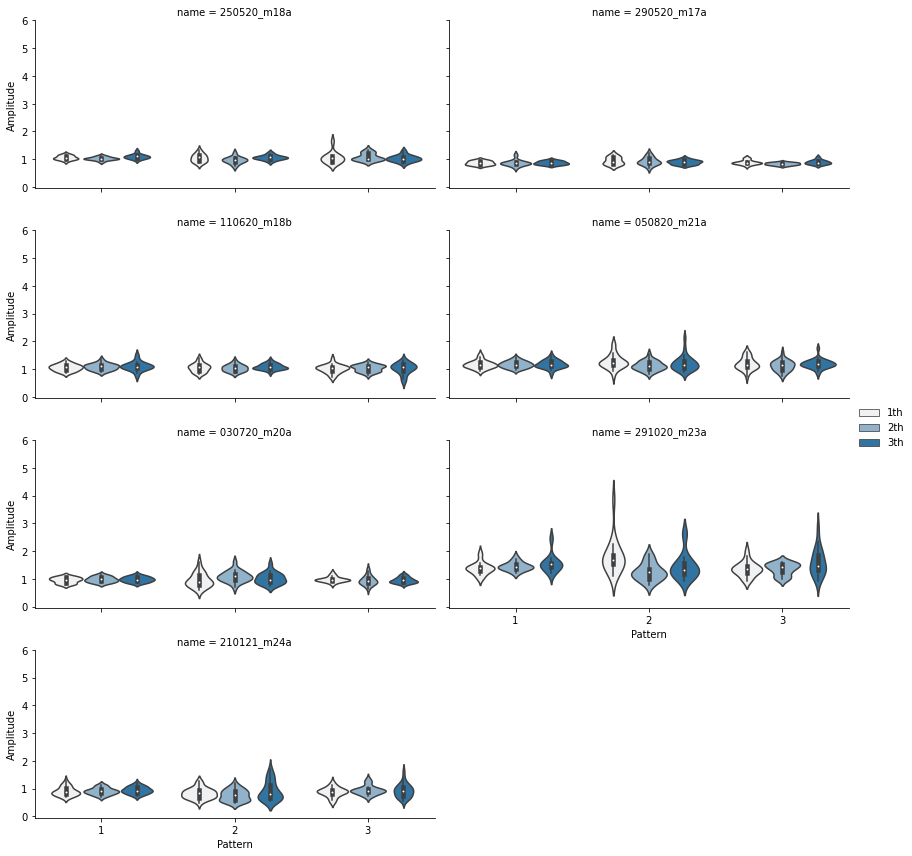

In [50]:
df_temp = pd.DataFrame()
df_temp = df_spindle_amplitude.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='Amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'Amplitude', 'subEpoch')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_amp/Type3_amp_based_on_top_20%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_amp/Type3_amp_based_on_top_20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% spindle activedivided to n

In [51]:
# plotting average firing rate 

df_spindle_amplitude = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if (not isinstance(indDict['type3'], int)) and (len(indDict['spi_osc_data'])):
        for ii in range(3):
            df_spindle_amplitude = df_spindle_amplitude.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][0][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][1][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_amplitude'][2][data_list[indDict['type3'][0]]['spindle_least20_diff_firing'][0]])], 
                                                                       'name':indDict['mouseName'], 
                                                                       'Pattern': ii+1, 
                                                                       'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


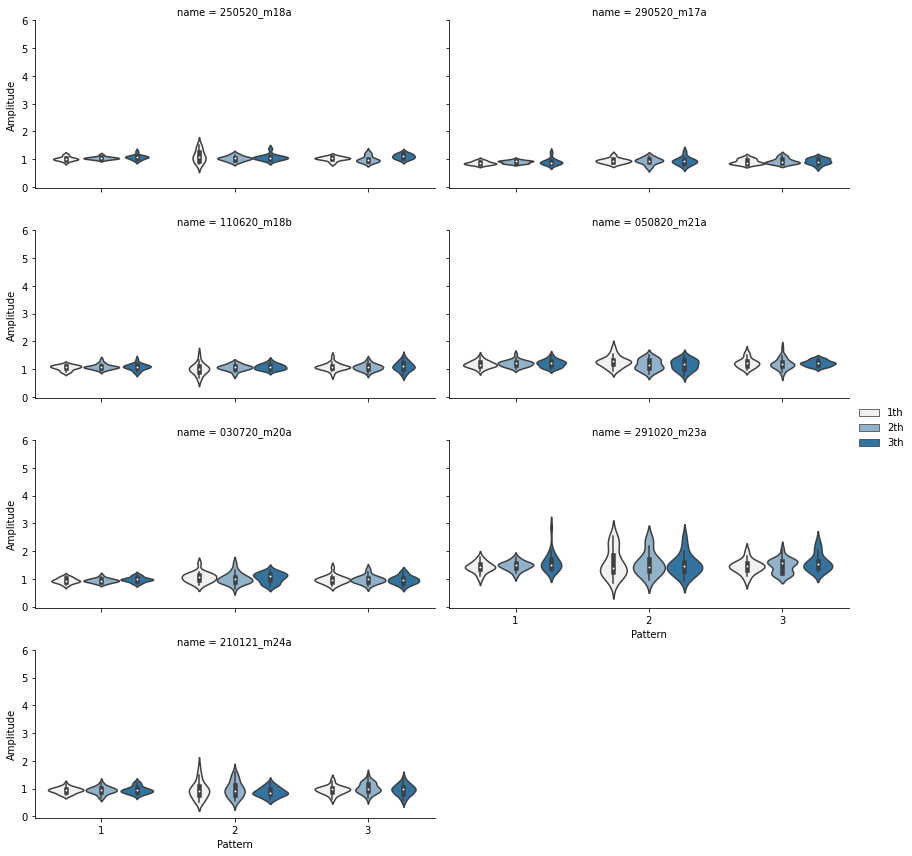

In [52]:
df_temp = pd.DataFrame()
df_temp = df_spindle_amplitude.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='subEpoch', value_name='Amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'Amplitude', 'subEpoch')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_amp/Type3_amp_based_on_least_20%_divided_thirds_slo_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_amp/Type3_amp_based_on_least_20%_divided_thirds_slo_active.pdf', dpi=300, format='pdf')

#### Frquency Type 4

#### Frequency based on top x% of sindle active

In [22]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type4'][0]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type4'][1]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type4'][2]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Fourth':[np.nanmean(data_list[data_dict['type4'][3]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


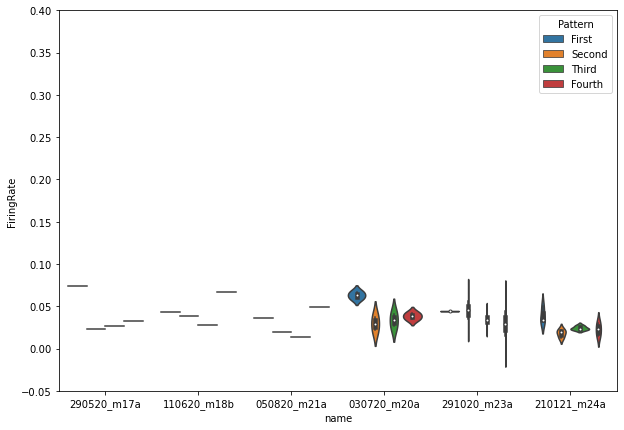

In [23]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 0.4])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_fr/Type4_fr_based_on_top_20%_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_fr/Type4_fr_based_on_top_20%_spindle_active.pdf', dpi=300, format='pdf')

#### Frequency based on least x% of sindle active

In [24]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type4'][0]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type4'][1]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type4'][2]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Fourth':[np.nanmean(data_list[data_dict['type4'][3]]['avg_firing_perSecond'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    

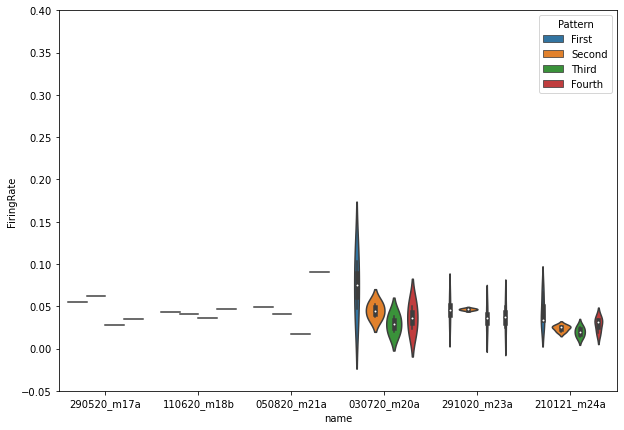

In [25]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 0.4])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_fr/Type4_fr_based_on_least_20%_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_fr/Type4_fr_based_on_least_20%_spindle_active.pdf', dpi=300, format='pdf')

#### Frequency based on top x% spindle active divided to n

In [26]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        for ii in range(4):
            df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


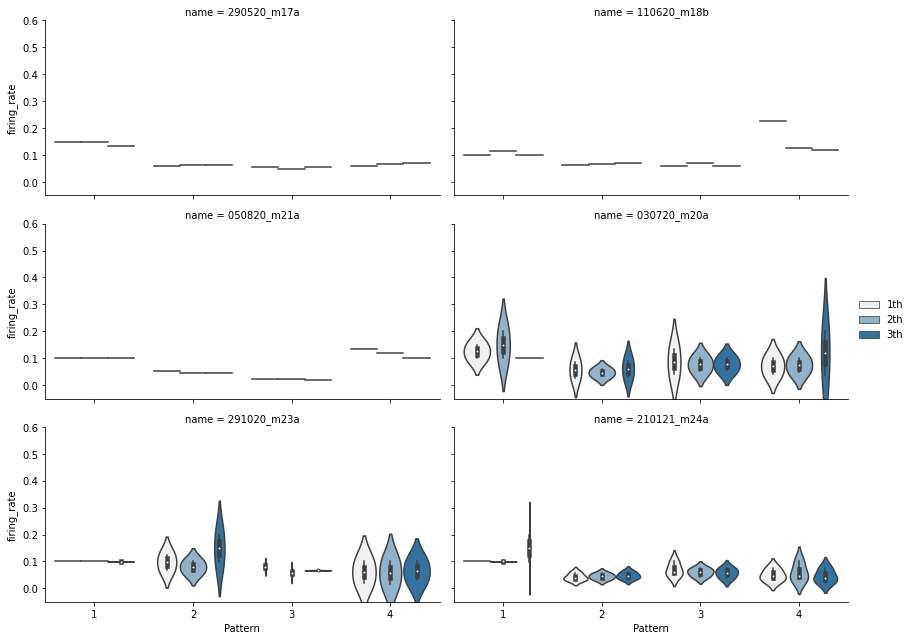

In [27]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='levels', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_fr/Type4_fr_based_on_top_20%_divided_thirds_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_fr/Type4_fr_based_on_top_20%_divided_thirds_spindle_active.pdf', dpi=300, format='pdf')

#### Frequency based on least x% spindle active divided to n

In [28]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        for ii in range(4):
            df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)
    

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


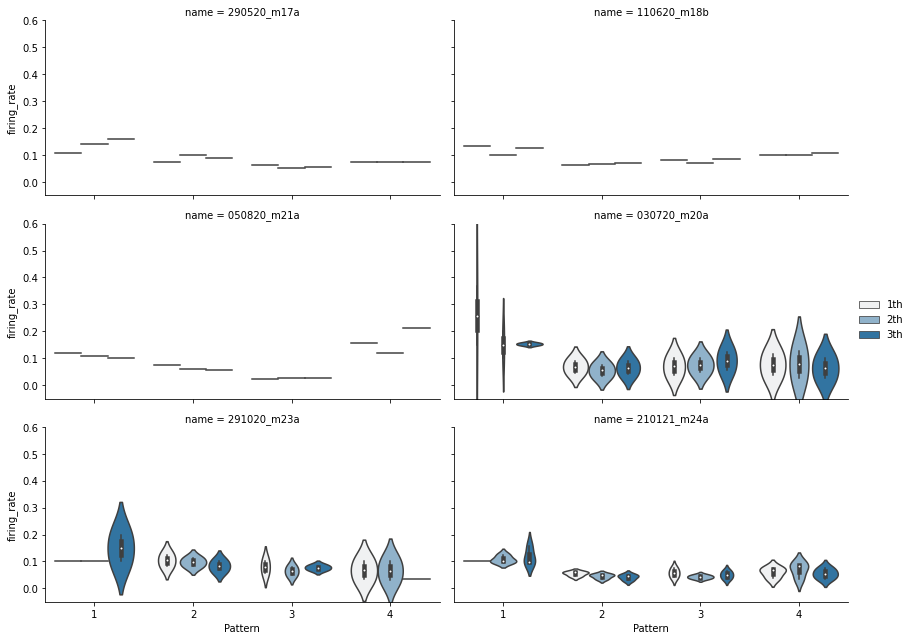

In [29]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='levels', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_fr/Type4_fr_based_on_least_20%_divided_thirds_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_fr/Type4_fr_based_on_least_20%_divided_thirds_spindle_active.pdf', dpi=300, format='pdf')

#### Amplitude

#### Amplitude based on top x% of sindle active

In [63]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type4'][0]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type4'][1]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type4'][2]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'Fourth':[np.nanmean(data_list[data_dict['type4'][3]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_top20_diff_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


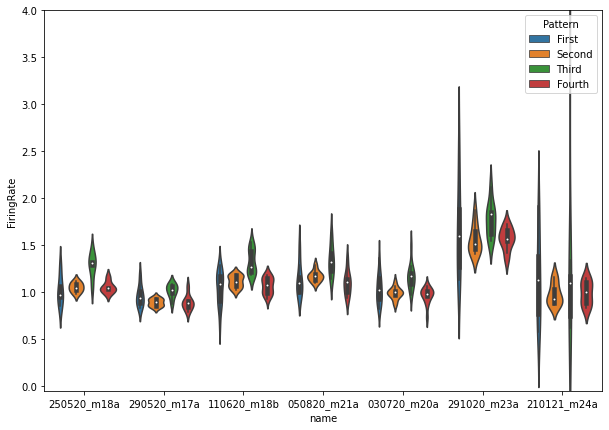

In [64]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 4])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_amp/Type4_amp_based_on_top_20%_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_amp/Type4_amp_based_on_top_20%_spindle_active.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% of sindle active

In [65]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type4'][0]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type4'][1]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type4'][2]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'Fourth':[np.nanmean(data_list[data_dict['type4'][3]]['avg_amplitude'][data_list[data_dict['type4'][1]]['spindle_least20_diff_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


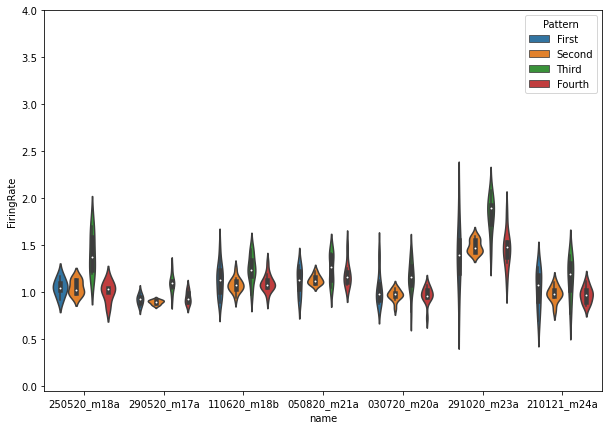

In [66]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_temp, y='FiringRate', x = 'name', hue='Pattern')
plt.ylim([-.05, 4])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_amp/Type4_amp_based_on_least_20%_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_amp/Type4_amp_based_on_least_20%_spindle_active.pdf', dpi=300, format='pdf')

#### Amplitude based on top x% spindle active divided to n

In [67]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        for ii in range(4):
            df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][0][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][1][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][2][data_list[indDict['type4'][1]]['spindle_top20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)
    

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


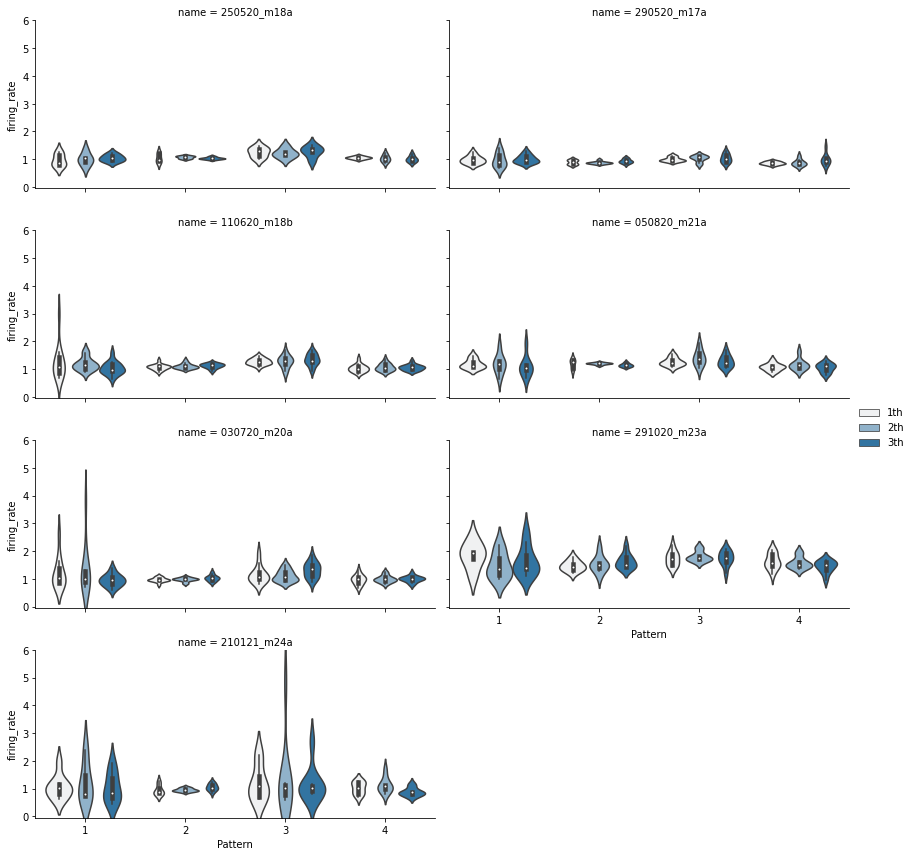

In [68]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='levels', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_amp/Type4_amp_based_on_top_20%_divided_thirds_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_amp/Type4_amp_based_on_top_20%_divided_thirds_spindle_active.pdf', dpi=300, format='pdf')


#### Amplitude based on least x% spindle active divided to n

In [69]:
# plotting average firing rate 

df_typ4_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type4'], int) and (len(data_list[i+1]['spi_osc_data'])):
        for ii in range(4):
            df_typ4_firing = df_typ4_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][0][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][1][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type4'][ii]]['div_avg_amplitude'][2][data_list[indDict['type4'][1]]['spindle_least20_diff_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ4_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='levels', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'Pattern', 'firing_rate', 'levels')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type4_amp/Type4_amp_based_on_least_20%_divided_thirds_spindle_active.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type4_amp/Type4_amp_based_on_least_20%_divided_thirds_spindle_active.pdf', dpi=300, format='pdf')



C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


### Read and write data as JSON file

In [61]:
with open('I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json', 'w') as wr:
    json.dump(data_list , wr, cls=NumpyEncoder)

In [62]:
with open(r"I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json", "r") as read_file:
    data_list = json.load(read_file)

In [78]:
# change lists to array
[data_dict.update({key: np.asarray(data_dict[key])}) for data_dict in data_list for key in data_dict.keys() if isinstance(data_dict[key], list)];

### Correlation Type2 Frequency spindle/SO per epoch 3rd-1st AWAKE-SWS

In [39]:
###################################### HINT ############################################
########################################################################################

#  This is a example cell to run Type2 awake sws with considering 20% top spindle/slow 
# from slow-wave which comes in SECOND PLACE

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 2  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(np.where(np.isnan(data_list[i-1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i-1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i-1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i-1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]))],
                                                             'Second':[np.nanmean(np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]))],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

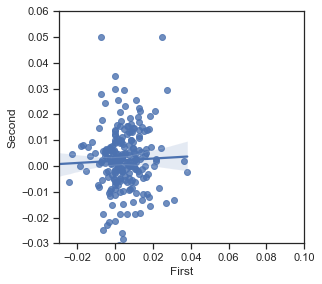

In [41]:
sns.set(rc={'figure.figsize':(4.4,4.27)})
sns.set_style("ticks")
g=sns.regplot(x="First",
           y="Second", robust=True,
           data=df_typ2_firing)
plt.xlim(-0.03,0.1)
plt.ylim(-0.03,0.06)
#if save_file:
  #  df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_spindle_inactive.csv')
if 0:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_slo_inactive.pdf', dpi=600, format='pdf')

### Correlation Type2 Frequency spindle/SO per epoch 3rd-1st SWS-REM

In [85]:
###################################### HINT ############################################
########################################################################################

#  This is a example cell to run Type2 awake sws with considering 20% top spindle/slow 
# from slow-wave which comes in SECOND PLACE

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':[np.nanmean(np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]))],
                                                             'Second':[np.nanmean(np.where(np.isnan(data_list[i+1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i+1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i+1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i+1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]))],
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

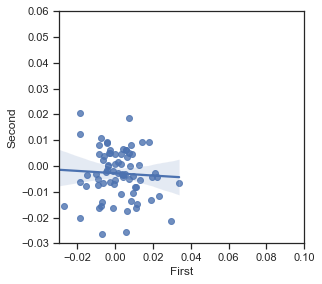

In [48]:
sns.set(rc={'figure.figsize':(4.4,4.27)})
sns.set_style("ticks")
g=sns.regplot(x="First",
           y="Second", robust=True,
           data=df_typ2_firing)
plt.xlim(-0.03,0.1)
plt.ylim(-0.03,0.06)
#if save_file:
  #  df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_spindle_inactive.csv')
if 0:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_slo_inactive.pdf', dpi=600, format='pdf')

### Correlation Type2 Frequency spindle/SO per cell 3rd-1st SWS-REM

In [73]:
###################################### HINT ############################################
########################################################################################

#  This is a example cell to run Type2 awake sws with considering 20% top spindle/slow 
# from slow-wave which comes in SECOND PLACE

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 1  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':(np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]])),
                                                             'Second':(np.where(np.isnan(data_list[i+1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i+1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i+1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i+1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]])),
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

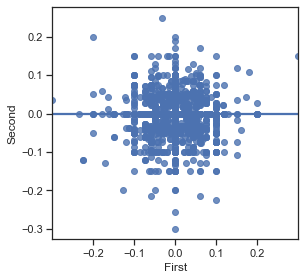

In [75]:
sns.set(rc={'figure.figsize':(4.4,4.27)})
sns.set_style("ticks")
g=sns.regplot(x="First",
           y="Second", robust=True,
           data=df_typ2_firing)
#plt.xlim(-0.03,0.1)
#plt.ylim(-0.03,0.06)
#if save_file:
  #  df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_spindle_inactive.csv')
if 0:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_slo_inactive.pdf', dpi=600, format='pdf')

### Correlation Type2 Frequency spindle/SO per cell 3rd-1st AWAKE-SWS

In [ ]:
###################################### HINT ############################################
########################################################################################

#  This is a example cell to run Type2 awake sws with considering 20% top spindle/slow 
# from slow-wave which comes in SECOND PLACE

df_typ2_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if indDict['type2'] == 2  and (len(indDict['spi_osc_data'])):
        
        df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'First':(np.where(np.isnan(data_list[i-1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i-1]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i-1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i-1]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]])),
                                                             'Second':(np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][2][data_list[i]['spindle_top20_diff_firing'][0]]) - np.where(np.isnan(data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]]), 0, data_list[i]['div_avg_firing_perSecond'][0][data_list[i]['spindle_top20_diff_firing'][0]])),
                                                             'name':indDict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
        

########################################################################################
########################################################################################

In [ ]:
sns.set(rc={'figure.figsize':(4.4,4.27)})
sns.set_style("ticks")
g=sns.regplot(x="First",
           y="Second", robust=True,
           data=df_typ2_firing)
plt.xlim(-0.03,0.1)
plt.ylim(-0.03,0.06)
#if save_file:
  #  df_typ2_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_spindle_inactive.csv')
if 0:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type2_fr_correlation_analysis/sws_rem/Type2_fr_slo_inactive.pdf', dpi=600, format='pdf')

### Spindles overlap

In [60]:
import pdb

In [86]:
# Type2 not divided

df_typ2_firing = pd.DataFrame()
old_spi_slo = []
old_index = []
old_mouse_name = []

for i, indDict in enumerate(data_list):
    
    if len(indDict['spi_osc_data']):
        
        if len(old_spi_slo):
            #pdb.set_trace()
            new_spi_slo = []
            new_spi_slo = indDict['spindle_top20_diff_firing'][0]
            fraction = len([rr for rr in old_spi_slo if rr in new_spi_slo]) / len(old_spi_slo)
            
            df_typ2_firing = df_typ2_firing.append(pd.DataFrame({'fraction':[fraction],
                                                                 'name':old_mouse_name, 
                                                                 'epochID': old_index}), ignore_index = True)
            
            old_spi_slo = new_spi_slo
            old_index = i
            old_mouse_name = indDict['mouseName']
    
            
        else:
            old_spi_slo = indDict['spindle_top20_diff_firing'][0]
            old_index = i
            old_mouse_name = indDict['mouseName']
        

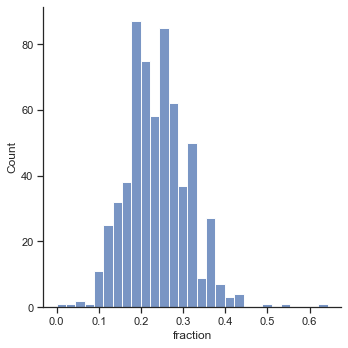

In [87]:
sns.displot(data = df_typ2_firing, x = "fraction")
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Histogram_overlap_spindle_active_cells.pdf', dpi=600, format='pdf')